In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [139]:
df= pd.read_csv('hw3.csv')
df.head()

,ts,open,high,low,close,volume,volumeUSD,token,chain
0,2021-12-02 14:00:00,22.4150,22.4913,22.0816,22.3516,31502.151631,NaN,UNI,ETH
1,2021-12-02 23:00:00,4.8043,4.8043,4.7426,4.7806,73686.230000,NaN,CRV,ETH
2,2021-12-10 15:00:00,182.4900,NaN,175.2100,175.8600,73736.747000,NaN,SOL,SOL
3,2021-12-10 18:00:00,3978.4300,3989.7400,3932.0000,3972.3400,18508.040102,NaN,ETH,ETH
4,2021-12-08 21:00:00,193.3240,194.2420,192.5640,193.1540,69426.909000,NaN,SOL,SOL


In [140]:
df.set_index('ts')
df.info()
# we know that we have missing data in [high, low, close, volumeUSD], and also, token name is dirty

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2667 entries, 0 to 2666
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ts         2667 non-null   object 
 1   open       2667 non-null   float64
 2   high       2163 non-null   float64
 3   low        2378 non-null   float64
 4   close      2531 non-null   float64
 5   volume     2667 non-null   float64
 6   volumeUSD  0 non-null      float64
 7   token      2667 non-null   object 
 8   chain      2667 non-null   object 
dtypes: float64(6), object(3)
memory usage: 187.6+ KB


In [141]:
df['token'].isnull().sum()

0

In [142]:
df['token'].value_counts()
# we could tell that out token names need to be cleaned

BTC                                   323
COMP                                  322
SOL                                   318
CRV                                   318
USDT                                  314
AAVE                                  312
UNI                                   312
ETH                                   298
<span name="tokenName">UNI</span>      30
<span name="tokenName">ETH</span>      28
<span name="tokenName">USDT</span>     19
<span name="tokenName">CRV</span>      17
<span name="tokenName">AAVE</span>     16
<span name="tokenName">SOL</span>      16
<span name="tokenName">BTC</span>      14
<span name="tokenName">COMP</span>     10
Name: token, dtype: int64

In [143]:
df.duplicated().sum()

307

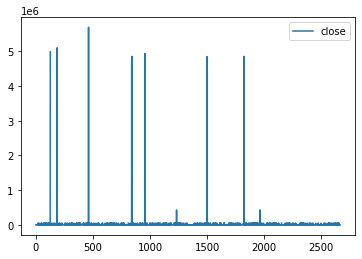

In [144]:
df[['token', 'close']].plot()

,ts,open,high,low,close,volume,volumeUSD,token,chain


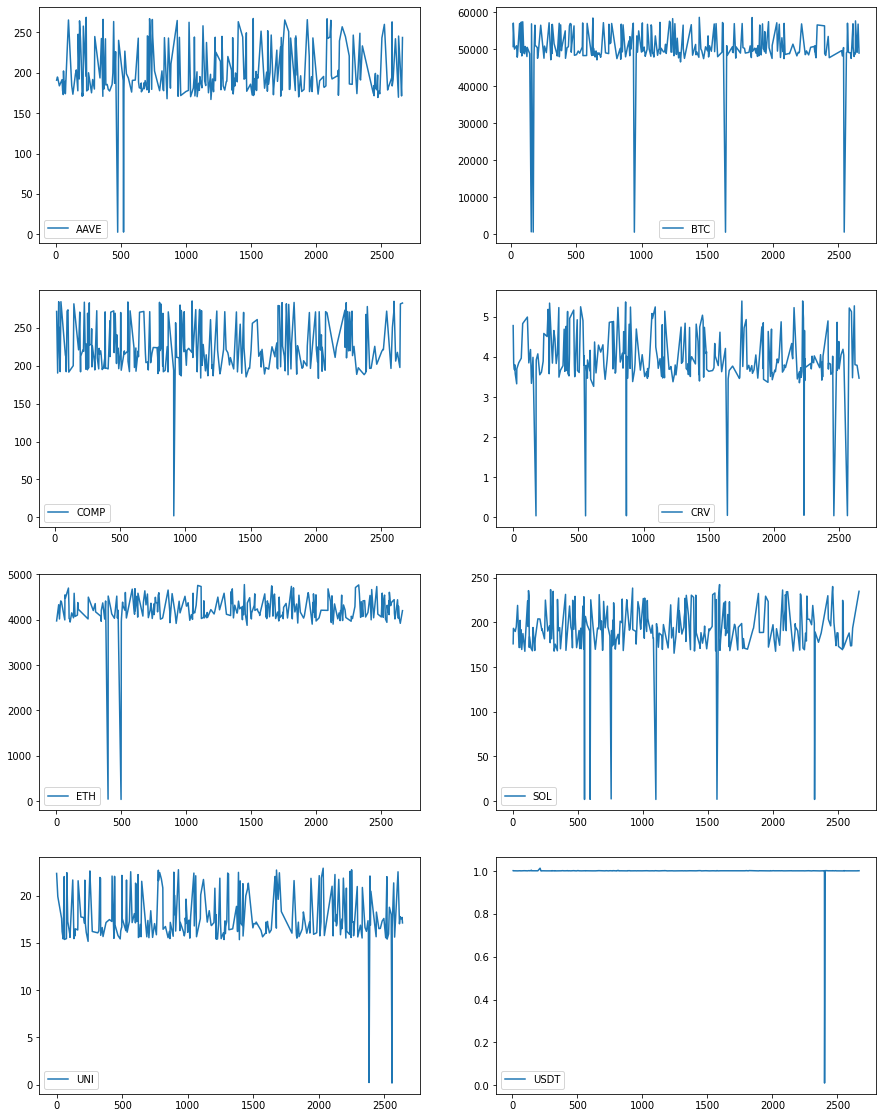

In [161]:
tokens_in_df = df.token.unique()

fig, axes = plt.subplots(nrows=math.ceil(tokens_in_df.size / 2), ncols=2, figsize=(15, 5 * math.ceil(tokens_in_df.size / 2)))

idx = 0
for label, df_token in df[['token', 'close']].groupby('token'):
    df_token['close'].plot(ax=axes[idx // 2, idx % 2], label=label)
    axes[idx // 2, idx % 2].legend()
    
    idx += 1

In [155]:
df = df.drop_duplicates()

In [156]:
df.duplicated().sum()

0

In [157]:
df['token'].str.contains('<span name="tokenName">').sum()

0

In [154]:
#df.loc[df['token'].str.contains('<span name="tokenName">'), 'token'] = df.loc[df['token'].str.contains('<span name="tokenName">'), 'token'].str.extract('<span name="tokenName">(.|\n)*?<\/span>')
df.loc[df['token'].str.contains('<\/span>'), 'token']=df.loc[df['token'].str.contains('<\/span>'), 'token'].str.extract('<span>(.|\n)*?<\/span>')


In [158]:
df.dropna()

,ts,open,high,low,close,volume,volumeUSD,token,chain


In [159]:
df = df[df['token'].notna()]

In [160]:
df['token'].value_counts()



COMP    286
BTC     283
SOL     281
AAVE    280
CRV     279
USDT    278
ETH     270
UNI     270
Name: token, dtype: int64

In [149]:
for tokens in df['token'].unique():
  mean=df.loc[df['token']==tokens,'high'].mean()
  df.loc[(df['token']==tokens) & (df['high'].isnull()),'high']=mean

In [150]:
for tokens in df['token'].unique():
  mean=df.loc[df['token']==tokens,'low'].mean()
  df.loc[(df['token']==tokens) & (df['low'].isnull()),'low']=mean

In [151]:
df.loc[df['close'].isnull(), 'close'] = 0.5 * (df.loc[df['close'].isnull(), 'high'] + df.loc[df['close'].isnull(), 'low'])


In [152]:
df.loc[df.close / df.open >= 2]
df.loc[df.close / df.open >= 2, 'close'] = 0.5 * (df.loc[df.close / df.open >= 2, 'high'] + df.loc[df.close / df.open >= 2, 'low'])
# now we check if we have any outliers
df.loc[df.close / df.open >= 2]

# we find out that we got rid of them


,ts,open,high,low,close,volume,volumeUSD,token,chain


In [162]:
df['volumeUSD']=df['volume']*df['close']


In [163]:
df

,ts,open,high,low,close,volume,volumeUSD,token,chain
0,2021-12-02 14:00:00,22.4150,22.49130,22.0816,22.3516,3.150215e+04,7.041235e+05,UNI,ETH
1,2021-12-02 23:00:00,4.8043,4.80430,4.7426,4.7806,7.368623e+04,3.522644e+05,CRV,ETH
2,2021-12-10 15:00:00,182.4900,197.82365,175.2100,175.8600,7.373675e+04,1.296734e+07,SOL,SOL
3,2021-12-10 18:00:00,3978.4300,3989.74000,3932.0000,3972.3400,1.850804e+04,7.352023e+07,ETH,ETH
4,2021-12-08 21:00:00,193.3240,194.24200,192.5640,193.1540,6.942691e+04,1.341009e+07,SOL,SOL
...,...,...,...,...,...,...,...,...,...
2661,2021-12-01 17:00:00,284.1400,284.89000,282.1800,282.3400,4.782140e+02,1.350189e+05,COMP,ETH
2662,2021-12-03 12:00:00,243.5040,244.47000,243.0960,243.7920,9.468390e+02,2.308318e+05,AAVE,ETH
2663,2021-12-03 07:00:00,231.1080,197.82365,231.1080,234.5980,3.624890e+04,8.503920e+06,SOL,SOL
2665,2021-12-03 23:00:00,4215.0000,4249.72000,4183.2300,4198.8300,1.364579e+04,5.729636e+07,ETH,ETH


In [164]:
df.groupby('chain')['volumeUSD'].sum()

chain
BTC     1.045347e+10
ETH     1.248916e+10
SOL     3.848609e+09
USDT    9.667021e+08
Name: volumeUSD, dtype: float64